# Sample Assessment: Scaling Concepts in Real Polymer Chains

## Introduction
We have been learning about the conformations of ideal polymer chains to show how parameters such as the number of monomers ($N$) and the length of a monomer ($b$) affect the average radius of gyration ($<R_g>$) of a polymer. For an ideal linear chain of freely jointed monomers, the radius of gyration can be expressed as the following:

  $<R_g> $$\approx$$ bN^{1/2}$

While this model of an ideal linear chain is accurate for real polymer chains under certain conditions (e.g. a polymer melt), it is inadequate to describe more complex behavior in real polymer chains because this models assumes:
  1. Monomers have zero excluded volume
  2. Monomers are non-interacting

In this assignment, we will be exploring how the radius of gyration scales with the number of monomers in real polymer chains by running molecular simulations of polymers that account for monomer interactions and excluded volume. The simulations are based on a simple coarse-grained model of polymers called dissipative particle dynamics (DPD). In DPD simulations, polymers are modeled as beads (i.e. monomers) connected by harmonic springs (i.e. bonds) and the beads interact with each other through a force ($f$) composed of a conservative force ($f_{c}$),  dissipative force ($f_{d}$), and random force ($f_{r}$) where:

$f=f_{c}+f_{d}+f{r}$

Conceptually, the dissipative force leads to a small attraction between the monomers and the conservative force acts to repel the monomers. The random force is there to account for thermal fluctuations in the system. In this assignment, we will explore how changing the repulsive interaction strength ($\alpha$) in the conservative force can change polymer chain conformations. The conservative force can be expressed as follows

  $f_{c} = \alpha(1 - r/r_{cut})$ $for$ $r < r_{cut}$ and $f_{c} = 0$ $for$ $r > r_{cut}$

where $r$ is the distance between monomers and $r_{cut}$ is the maximum distance interaction distance between monomers. Conceptually, increasing $\alpha$ will increase the repulsive interaction between nearby monomers.

## Instructions

For this assignment we will be running DPD simulations on linear, homopolymers in order to see how varying the repulsion between monomers will affect the polymer's radius of gyration and chain conformation. You will need to answer the following questions:

  1. Create a plot of the average radius of gyration of a polymer ($<R_{g}>$) as a function of the number of monomers ($N$) for different values of $\alpha$. I recommend looking at values of $N$ from 10 to 200 and values of $\alpha$ from 0 to 20. (40 pts)

  2. Visualize the chain conformation of polymer of 100 repeat units at different values of $\alpha$. Explain how the shape of the polymer changes as you increase the repulsive force between monomers. (15 pts)

  3. Real polymer chains can be modeled by a power law equation where $<R_g>=bN^{\nu}$ where $\nu$ is the scaling exponent. Fit this equation to your data from Question 1 and calculate the scaling exponent ($\nu$) for different values of $\alpha$. Plot your fitted equation alongside your simulated data to visualize how accurately the model describes your data. Note: the length of the monomers ($b$) in our DPD simulations is set to 1, so you can fit your data to a simpler equation where $<R_g>=N^{\nu}$. (15 pts) 

  4. Read through Chapter 3 of Rubinstein and Colby's *Polymer Physics* book. Relate your calculated values of $\nu$ to the different regimes of real polymer chains as outlined in the text. Did you find a value of $\alpha$ where the polymer chains almost follow ideal chain behavior? What are some physical or experimental ways that you can change the monomer interaction strength in real-world polymers? (30 pts)

  5. BONUS: Simulate polymers at very large values of $\alpha$ and visualize the conformations. Do you see any unexpected or non-physical behavior? Provide an explanation for why you are seeing this behavior. (5 pts)



# Tutorial: Simulating Linear Polymers

Below is a tutorial on how to run DPD simulations in a Google Colab Notebook and analyze the results. Google Colab Notebooks use the Python programming language, but you should easily be able to simulate polymers with little to no programming experience

## Step 1: Load Necessary Python Packages 

Before you begin simulating polymers, you first need to install the correct software packages to run DPD simulations. Execute the cell of code below by pressing the "play" on the top left corner of the cell or press "shift+enter". We will be using the hoomd-blue molecular dynamics software to run our simulations. Click this linke (http://glotzerlab.engin.umich.edu/hoomd-blue/) is you want to learn more about this molecular dynamics software.

In [ ]:
# Install library to install packages by conda
!pip install -q condacolab

import condacolab
condacolab.install()

# Install hoomd, gsd, fresnel, Pillow, and poly-dpd
!conda install -c conda-forge hoomd
!conda install -c conda-forge gsd
!conda install -c conda-forge fresnel
!pip install --upgrade Pillow
!pip install git+https://github.com/ericbruckner/polysim


⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:31
🔁 Restarting kernel...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

## Step 2: Simulate a Linear Polymer

For this assignment, we will only be changing the number of monomers ($N$) and the repulsive interaction strength ($\alpha$) by editing the variables <code>N</code> and <code>alpha</code> in the section of code below. The function <code>simulate_polymer_dpd</code> takes the variables <code>N</code> and <code>alpha</code>, runs a DPD simulation, then output the XYZ coordinates of the monomers in the variable coordinates.

In [ ]:
from polysim.main import simulate_polymer_dpd

## Enter number of monomers
N = 10;

## Enter alpha, the repulsive force constant in the DPD conservative force
alpha = 1000;

## Run simulation: Save the XYZ coordinates of the monomers
coordinates  = simulate_polymer_dpd(N, alpha);

## View monomer XYZ coordiantes
print(coordinates)


[[-2.0723598  -2.5507956   4.9816985 ]
 [ 0.13777366 -1.6743776  -3.2779524 ]
 [ 2.1956336  -0.8035293  -1.5695038 ]
 [ 4.6702294   0.36698866 -1.2222298 ]
 [-2.453388    0.32667723 -1.3382589 ]
 [-2.4337957   3.1887763  -0.9920677 ]
 [-1.0272278  -4.385511   -1.4864514 ]
 [ 1.7183154   4.7504625  -1.9794405 ]
 [ 4.3780866   4.971644   -2.8759456 ]
 [ 4.886732   -4.190335   -0.23984882]]


## Step 3: Visualize the simulated polymer

Once the polymer has been simulated, we can visualize the conformation using the <code>render_polymer</code> function. This function takes the monomer coordinates output (i.e. <code>coordinates</code> variable) from the <code>simulate_polymer_dpd</code> function from the code above and renders a 3D visualization of the polymer. 

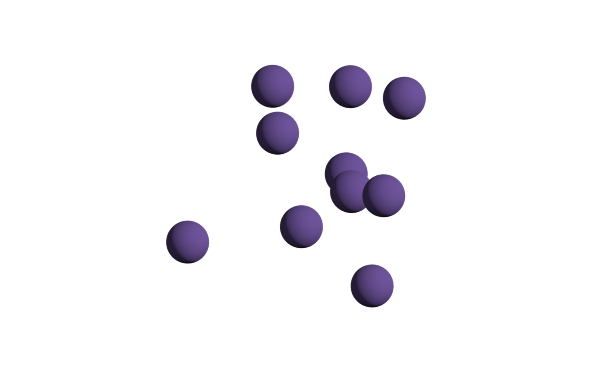

In [ ]:
from polysim.main import render_polymer

render_polymer(coordinates)


## Step 4: Calculate the radius of gyration of your simulated 

We can calculate the radius of gyration ($R_{g}$) of the polymer using the <code>radius_gyration</code> function which takes the monomer coordinates as an input, and outputs the radius of gyration  ($R_{g}$). Note: The units in DPD simulations are based on the diameter ($\sigma$) of our monomer "beads". Use units of $\sigma$ when reporting the value of the radius of gyration in this assignment.

In [ ]:
from polysim.main import radius_gyration

Rg = radius_gyration(pos)

print(Rg)

2.1221953812260654


# Rubric

## Question 1
  - 20 points account for successfully running the simulations
  - 5 points account for calculating the average radius of gyration ($<R_{g}>$) and simulating multiple polymer chains for every data point
  - 5 points account for correctly labeled plots
  - 10 points account for choosing an appropriate number of data points for values of N and values of alpha. A perfect solution would have at least 10 values of N spaced, relatively evenly between 10 and 200 and scanning 5-10 values of $\alpha$ ranging from 0 to 20.

## Question 2
  - 5 points account for accurately rendering the simulated polymer chains
  - 10 points account for an explanation of the chain conformation. Full points awarded for explaining how the chains elongate as the repulsive interaction between monomers increases.

## Question 3
  - 10 points account for successfully doing a power law fit with the equation given
  - 5 points account for ploting the fitted equation alongside the experimental data. Full points awarded for well-labeled plots that are easy to read.

## Question 4
  - 10 points account for relating $\nu = 1/3$ to collapsed chains, $\nu = 1/2$ to ideal chains, and $\nu = 0.588$ to swollen chains.
  - 10 points account for explaining how very low values of $\alpha$ lead to the simulation of nearly ideal chains
  - 10 points account for explaining how solvent and temperature effects can lead to the swelling and collapse of polymer chains. 

## Question 5
  - Full points awarded for looking at values of $\alpha$ above 100, showing a visualization of non-bonded monomers, and then explaining how the repulsive interaction between monomers was enough to overcome the bond strength holding the monomers together into a polymer. 

# Pythonic solution for generating correct data for the assignment

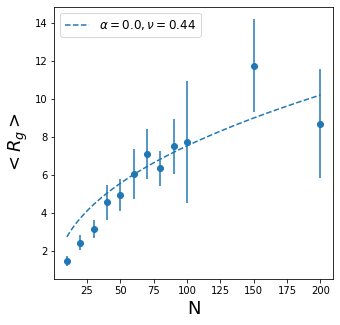

In [ ]:
## Generating Data
from polysim.main import simulate_polymer_dpd
from polysim.main import render_polymer
from polysim.main import radius_gyration
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

n_chains = 5
n_monomers = [10,20,30,40,50,60,70,80,90,100,150,200] #[10,15,20,25,30,35,40,45,50]
alpha_list = [0] #[0,1,5,10,20,50,100] #[0,1,5,10,20,30,40,50]

fig = plt.figure(figsize = [5, 5])

colors = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:cyan','tab:olive','tab:pink','tab:brown']

def fitfunc(x, nu):
  return x**nu

count = 0
for alpha in alpha_list:
  Rg_average = []
  Rg_error = []
  for N in n_monomers:
    Rg_list = []
    for i in range(n_chains):
      pos = simulate_polymer_dpd(N, alpha);
      Rg_list.append(radius_gyration(pos))
    Rg_average.append(np.mean(Rg_list))
    Rg_error.append(np.std(Rg_list))

  # fit function
  popt, pcov = curve_fit(fitfunc, n_monomers, Rg_average, bounds=(0,1))
  xdata = np.linspace(min(n_monomers), max(n_monomers),10**2)

  plt.scatter(n_monomers, Rg_average, c=colors[count])
  plt.errorbar(n_monomers, Rg_average, yerr=Rg_error, ls='none', c=colors[count])
  plt.plot(xdata, fitfunc(xdata,*popt), '--',c=colors[count], label='$\\alpha = %.1f,\\nu=%.2f$'%(alpha, popt[0]))

  filename = 'results_alpha=%i.csv'%alpha
  data = {'N' : n_monomers,
          'Rg': Rg_average,
          'error': Rg_error}
  df = pd.DataFrame(data)
  df.to_csv(filename, index=False)

  count = count + 1

plt.legend(loc = 'upper left', fontsize = 12);
plt.xlabel('N', fontsize = 18);
plt.ylabel('$<R_g>$', fontsize = 18);


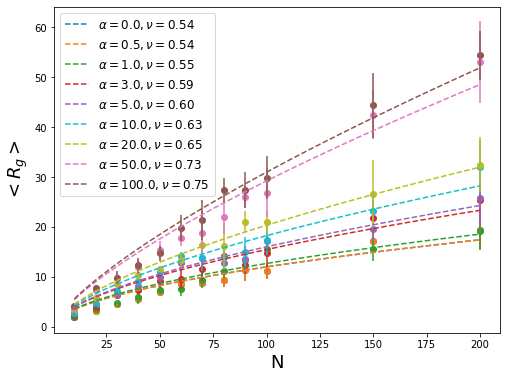

In [ ]:
## Plotting Data

alpha_list = [0,0.5,1,3,5,10,20,50,100]

colors = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:cyan','tab:olive','tab:pink','tab:brown']
count = 0

def fitfunc(x, nu):
  return x**nu

fig = plt.figure(figsize = [8, 6])

for alpha in alpha_list:
  filename = 'results_alpha=%i.csv'%alpha
  df = pd.read_csv(filename)
  n_monomers = df['N']
  Rg_average = df['Rg']
  Rg_error = df['error']

  # fit function
  popt, pcov = curve_fit(fitfunc, n_monomers, Rg_average, bounds=(0,1))
  xdata = np.linspace(min(n_monomers), max(n_monomers),10**2)

  plt.scatter(n_monomers, Rg_average, c=colors[count])
  plt.errorbar(n_monomers, Rg_average, yerr=Rg_error, ls='none', c=colors[count])
  plt.plot(xdata, fitfunc(xdata,*popt), '--',c=colors[count], label='$\\alpha = %.1f,\\nu=%.2f$'%(alpha, popt[0]))

  count = count + 1

plt.legend(loc = 'upper left', fontsize = 12);
plt.xlabel('N', fontsize = 18);
plt.ylabel('$<R_g>$', fontsize = 18);